In [1]:
# Dataset
# u.data - 100000 ratings by 943 users on 1682 items - user id | item id | rating | timestamp 
# u.item - Information about the items (movies) - movie id | movie title | release date | video release date |
        # IMDb URL | unknown | Action | Adventure | Animation |Children's | Comedy | Crime | Documentary | Drama | Fantasy |
        # Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |Thriller | War | Western |
# u.genre - A list of the genres.
# u.user  - Demographic information about the users - user id | age | gender | occupation | zip code
# u.occupation - A list of the occupations

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# Create panda data frame for u.data
user_rating_data = pd.read_csv('u.data', delim_whitespace=True, header=None)
user_rating_data.columns = ["user_id", "movie_id", "ratings", "timestamp"]
user_rating_data.head()

,user_id,movie_id,ratings,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


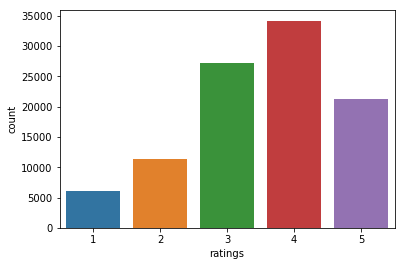

In [22]:
sns.countplot(x="ratings",data=user_rating_data)

In [19]:
user_data=pd.read_csv('u.user',sep='|',header=None)
user_data.columns=['user_id','age','gender','occupation','zip_code']
user_data.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [27]:
np.size(np.unique(user_data['occupation']))

21

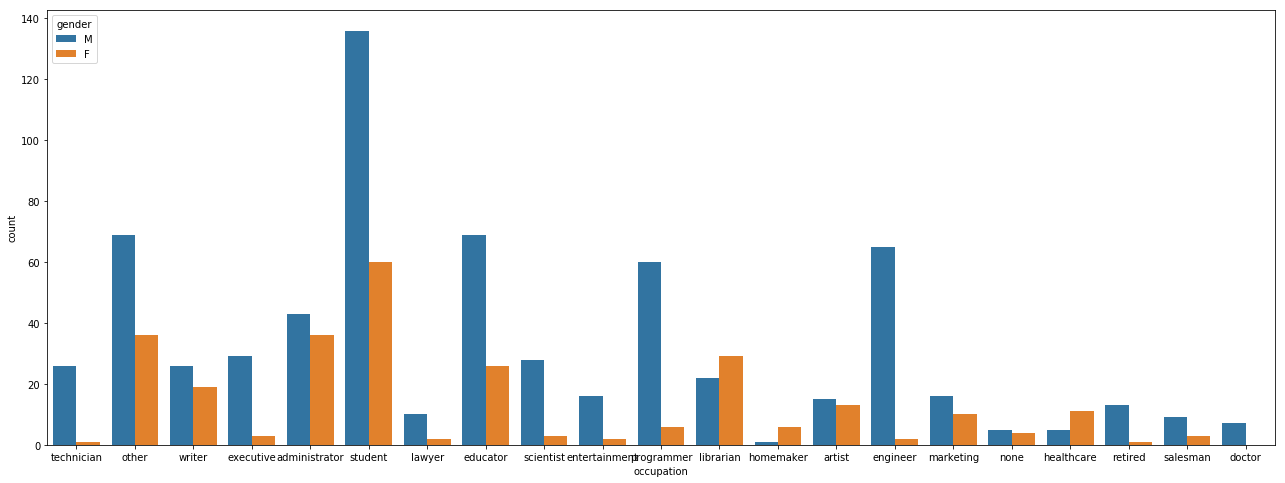

In [35]:
dims = (22, 8)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(x="occupation",data=user_data,hue="gender",ax=ax)

In [20]:
data_user_movies=pd.merge(user_data,user_rating_data,on='user_id')
data_user_movies.head()

,user_id,age,gender,occupation,zip_code,movie_id,ratings,timestamp
0,1,24,M,technician,85711,61,4,878542420
1,1,24,M,technician,85711,189,3,888732928
2,1,24,M,technician,85711,33,4,878542699
3,1,24,M,technician,85711,160,4,875072547
4,1,24,M,technician,85711,20,4,887431883


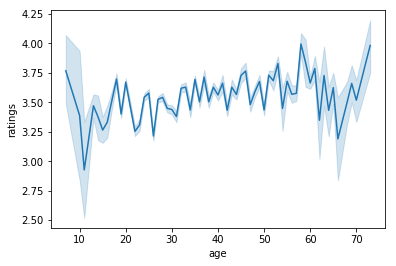

In [4]:
sns.lineplot(x="age",y="ratings",data=data_user_movies)

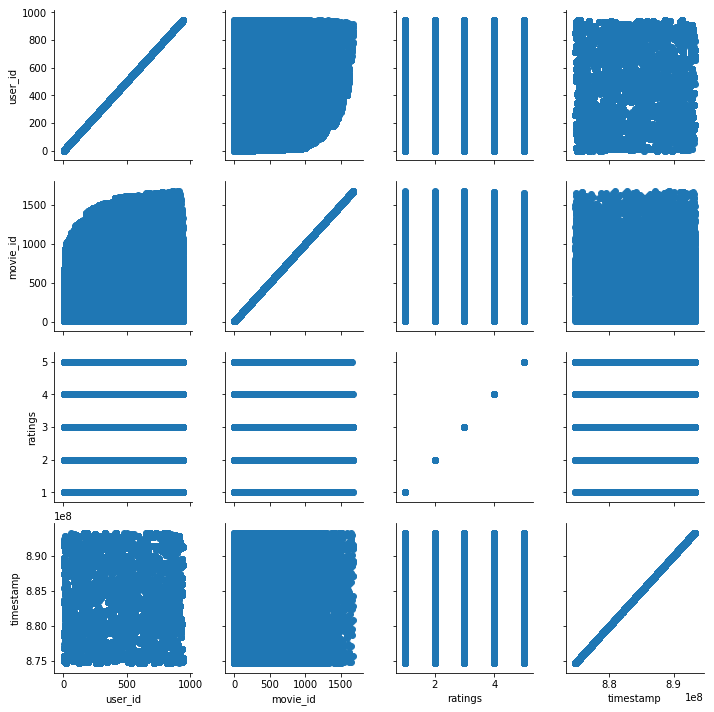

In [5]:
g=sns.PairGrid(user_rating_data)
g.map(plt.scatter)

In [6]:
# function to bucket movie years
def movie_bucket(year):
    year=int(year);
    if (year<1970):
      return 1960;
    elif (year>1970 and year<1980):
      return 1980;
    elif (year>1980 and year<1990):
      return 1990;
    elif (year>1990 and year<2000):
      return 2000;
    elif (year>2000 and year<2010):
      return 2010;
    elif (year>2010):
      return 2020

In [38]:
# Creating panda dataframe for u.item
movie_data=pd.read_csv('u.item',sep='|',header=None,encoding='latin-1')
#movie_data=movie_data.iloc[:,0:6]
movie_data.columns=['movie_id','movie_title','release_date','video_release_date','imdb_url','unknown','Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
movie_data.dropna(subset=["release_date"],inplace= True)
movie_data.head()

,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [39]:
movie_data['movie_year']=movie_data['release_date'].str.split('-').str.get(2);
movie_data['movie_decade']=movie_data['movie_year'].apply(movie_bucket);
movie_data.head()

,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,movie_year,movie_decade
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1995,2000.0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1995,2000.0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1995,2000.0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1995,2000.0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,1,0,0,1995,2000.0


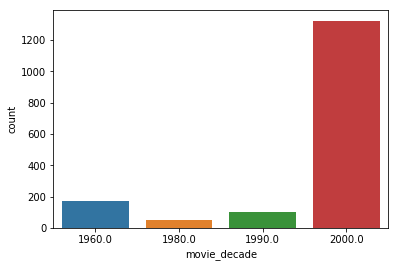

In [41]:
sns.countplot(x="movie_decade",data=movie_data)

In [42]:
data_user_movies_det=pd.merge(data_user_movies,movie_data,on='movie_id')
data_user_movies_det.head()

,user_id,age,gender,occupation,zip_code,movie_id,ratings,timestamp,movie_title,release_date,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,movie_year,movie_decade
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,1994,2000.0
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,1994,2000.0
2,18,35,F,other,37212,61,4,880130803,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,1994,2000.0
3,58,27,M,programmer,52246,61,5,884305271,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,1994,2000.0
4,59,49,M,educator,08403,61,4,888204597,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,1994,2000.0


In [17]:
data_user_movies_det[data_user_movies_det.columns.difference(['user_id','movie_id','release_date','zip_code','video_release_date', 'timestamp','imdb_url'])].head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,War,Western,age,gender,movie_decade,movie_title,movie_year,occupation,ratings,unknown
0,0,0,0,0,0,0,0,1,0,0,...,0,0,24,M,2000.0,Three Colors: White (1994),1994,technician,4,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,47,M,2000.0,Three Colors: White (1994),1994,educator,4,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,35,F,2000.0,Three Colors: White (1994),1994,other,4,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,27,M,2000.0,Three Colors: White (1994),1994,programmer,5,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,49,M,2000.0,Three Colors: White (1994),1994,educator,4,0
